In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import nltk
import re

# Оценка стоимости квартиры в Нью Йорке
Набор данных о жилье в Нью-Йорке содержит информацию о проектах по строительству доступного жилья Департамента жилищного строительства и охраны окружающей среды города Нью-Йорка. Он включает данные о характеристиках зданий, уровнях ценовой доступности, местоположении и информации о владельцах для всех объектов недвижимости в наборе данных.
Необходимо узнать, как различные признаки влияют на цену жилья.

# 1. Прочитать данные

In [2]:
url = "https://raw.githubusercontent.com/Marina-Labinskaya/ML-2023/main/apartment_cost_list.csv"
data_raw = pd.read_csv(url)

Первые и последние значения из таблицы данных:

In [3]:
data_raw

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,122923649,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,NaN,NaN,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...
19609,121090112,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,NaN,NaN,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...
19610,102937342,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,NaN,NaN,0,C6-2,Interior renovation of an existing apartment. ...
19611,200838558,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,NaN,$40000.00,0,NaN,NaN,0,R6,Proposed to renovate existing apartments. No c...


Количество объектов:

In [4]:
data_raw.shape[0]

19613

Количество признаков у каждого объекта:

In [5]:
data_raw.shape[1]

18

Выведем информацию о датасете:

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job #                   19613 non-null  int64 
 1   Borough                 19613 non-null  object
 2   House #                 19613 non-null  object
 3   Street Name             19613 non-null  object
 4   Block                   19613 non-null  int64 
 5   Lot                     19613 non-null  int64 
 6   Bin #                   19613 non-null  int64 
 7   Job Type                19613 non-null  object
 8   Community - Board       19613 non-null  int64 
 9   Curb Cut                16 non-null     object
 10  Fully Permitted         15625 non-null  object
 11  Initial Cost            19613 non-null  object
 12  Proposed Zoning Sqft    19613 non-null  int64 
 13  Horizontal Enlrgmt      163 non-null    object
 14  Vertical Enlrgmt        242 non-null    object
 15  En

Отсюда видно, что имеются следующие признаки:


* Job - уникальный идентификатор (ID)
* Borough - район города
* House - номер дома
* Street Name - название улицы
* Block - квартал/область
* Lot - участок
* Bin - урна
* Job Type - тип здания
* Community - Board - сообщество
* Curb Cut - срез бордюра
* Fully Permitted - дата сдачи дома
* Initial Cost - цена
* Proposed Zoning Sqft - зонирование квадратных футов
* Horizontal Enlrgmt  - горизонтальный вход
* Vertical Enlrgmt - вертикальный вход
* Enlargement SQ Footage - увеличение квадратного метра
* Zoning Dist1 - зонирование района
* Job Description - описание дома


Категориальные признаки: Job, Borough, House, Street Name, Job Type, Curb Cut, Fully Permitted, Zoning Dist1, Initial Cost, Horizontal Enlrgmt, Vertical Enlrgmt.

Количественные признаки: Block, Lot, Bin, Community - Board, Proposed Zoning Sqft, Enlargement SQ Footage.

Текстовый признак: Job Description.

Для категориальных признаков изменим тип на тип category:

In [7]:
data_raw['Job #'] = data_raw['Job #'].astype('category')

In [8]:
data_raw['Borough'] = data_raw['Borough'].astype('category')

In [9]:
data_raw['House #'] = data_raw['House #'].astype('category')

In [10]:
data_raw['Street Name'] = data_raw['Street Name'].astype('category')

In [11]:
data_raw['Job Type'] = data_raw['Job Type'].astype('category')

In [12]:
data_raw['Curb Cut'] = data_raw['Curb Cut'].astype('category')

In [13]:
data_raw['Zoning Dist1'] = data_raw['Zoning Dist1'].astype('category')

In [14]:
data_raw['Horizontal Enlrgmt'] = data_raw['Horizontal Enlrgmt'].astype('category')

In [15]:
data_raw['Vertical Enlrgmt'] = data_raw['Vertical Enlrgmt'].astype('category')

In [16]:
data_raw['Fully Permitted'] = data_raw['Fully Permitted'].astype('category')

Значения признака `'Initial Cost'` начинаются со знака $, уберем его из значений.

In [17]:
for i in range(len(data_raw['Initial Cost'])):
  data_raw['Initial Cost'][i] = (data_raw['Initial Cost'][i].replace('$', ''))
data_raw['Initial Cost'] =  data_raw['Initial Cost'].astype('category')

<ipython-input-17-21686b343afe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['Initial Cost'][i] = (data_raw['Initial Cost'][i].replace('$', ''))


# 2.  Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать

Выведем все диаграммы рассеивания для количественных признаков.

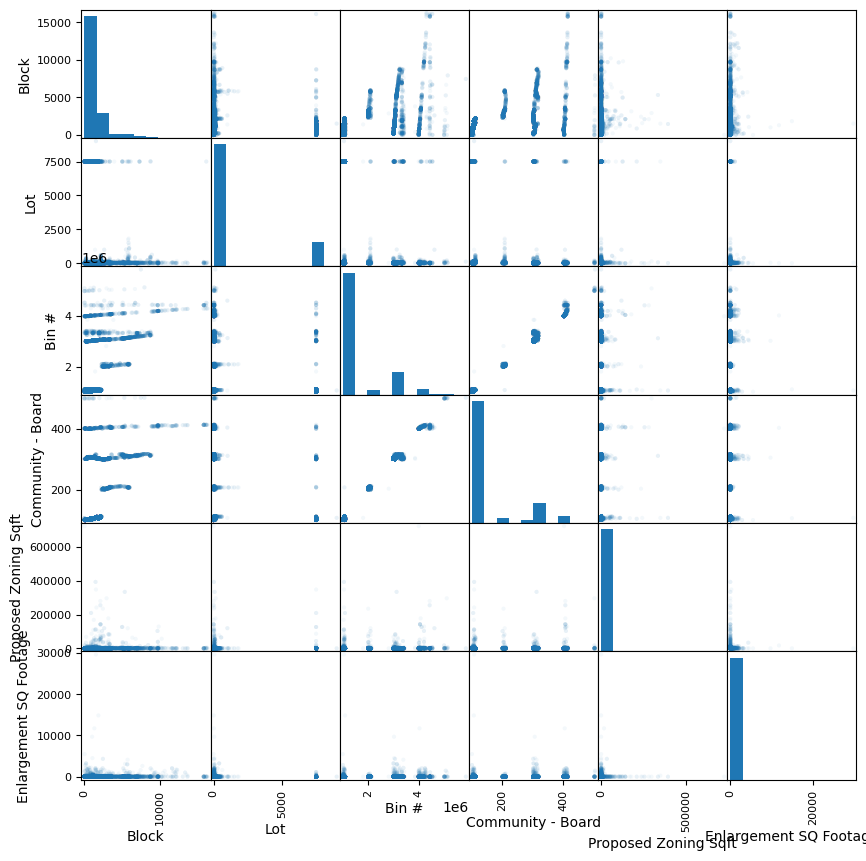

In [ ]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 10), alpha = 0.05)
pass

Посмотрим, как распределяются цены на квартиры:

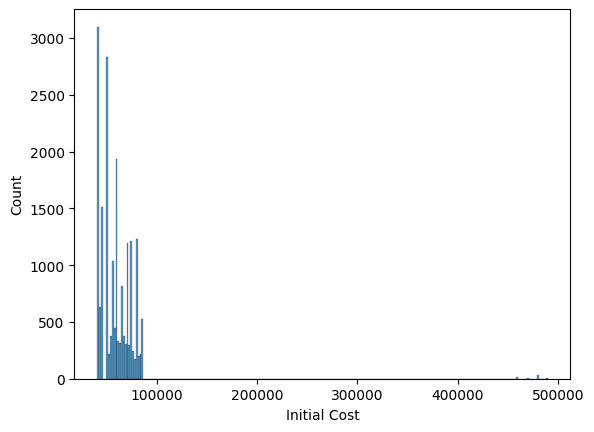

In [ ]:
sns.histplot(data = data_raw['Initial Cost'].astype('float'))
pass

Вычислим основные статистические характеристики:

* mean - среднее значение
* std - стандартное отклонение
* min - минимум
* 25% - нижнее значение первого квантиля
* 50% - медиана
* 75% - верхнее значение первого квантиля
* max - максимум

In [ ]:
data_raw.describe()

,Block,Lot,Bin #,Community - Board,Proposed Zoning Sqft,Enlargement SQ Footage
count,19613.000000,19613.000000,1.961300e+04,19613.000000,19613.000000,19613.000000
mean,1551.725794,1261.811197,1.506365e+06,151.269005,719.625809,18.639219
std,1550.780753,2764.626109,9.319992e+05,90.115653,10859.926278,303.278381
min,0.000000,0.000000,1.000043e+06,101.000000,0.000000,0.000000
25%,816.000000,17.000000,1.028758e+06,105.000000,0.000000,0.000000
50%,1245.000000,36.000000,1.046983e+06,107.000000,0.000000,0.000000
75%,1576.000000,66.000000,1.084564e+06,111.000000,0.000000,0.000000
max,16278.000000,9007.000000,5.860016e+06,503.000000,724475.000000,29687.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках. Получим информацию о категориальных:

In [ ]:
data_raw.describe(include=['category'])

,Job #,Borough,House #,Street Name,Job Type,Curb Cut,Fully Permitted,Initial Cost,Horizontal Enlrgmt,Vertical Enlrgmt,Zoning Dist1
count,19613,19613,19613,19613,19613,16,15625,19613,163,242,17517
unique,13403,5,1959,2580,3,1,4392,46,1,2,145
top,103696608,MANHATTAN,200,PARK AVENUE,A2,X,01/29/2003,40000.00,Y,Y,R8B
freq,6,15341,237,675,18126,16,22,2877,163,241,1943


**Борьба с выбросами**

Представим данные в виде ящика с усами.


Ящик с усами (бокс-диаграмма) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

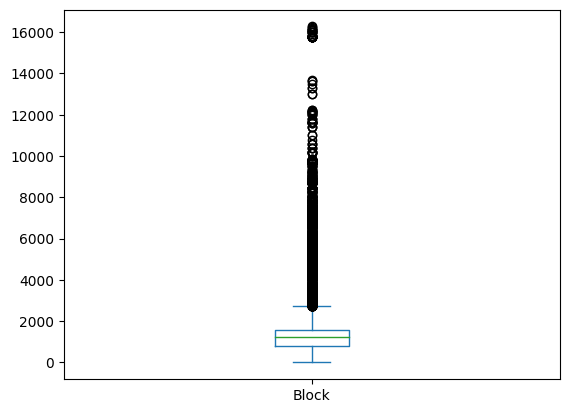

In [ ]:
data_raw['Block'].plot(kind='box')
pass

In [ ]:
data_raw['Block'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      17.00
0.010      52.00
0.050     263.00
0.100     452.00
0.500    1245.00
0.900    2463.00
0.950    4713.00
0.990    8720.00
0.995    9766.76
Name: Block, dtype: float64

Удалим все строки таблицы, в которых `'Block'`выходят за пределы квантилей $0.005$, $0.995$.

In [18]:
rows_to_drop = data_raw[
    (data_raw['Block'] < data_raw['Block'].quantile(0.005)) | (data_raw['Block'] > data_raw['Block'].quantile(0.995))].index
data_raw.drop(rows_to_drop, inplace=True)
data_raw.shape

(19419, 18)

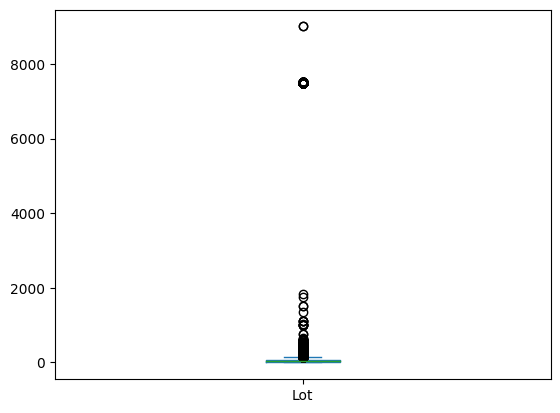

In [ ]:
data_raw['Lot'].plot(kind='box')
pass

In [ ]:
data_raw['Lot'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       1.0
0.010       1.0
0.050       1.0
0.100       3.0
0.500      36.0
0.900    7501.0
0.950    7502.0
0.990    7504.0
0.995    7505.0
Name: Lot, dtype: float64

Удалим все строки таблицы, в которых `'Lot'`выходят за пределы квантилей $0.005$, $0.995$.

In [19]:
rows_to_drop = data_raw[
    (data_raw['Lot'] < data_raw['Lot'].quantile(0.005)) | (data_raw['Lot'] > data_raw['Lot'].quantile(0.995))].index
data_raw.drop(rows_to_drop, inplace=True)
data_raw.shape

(19347, 18)

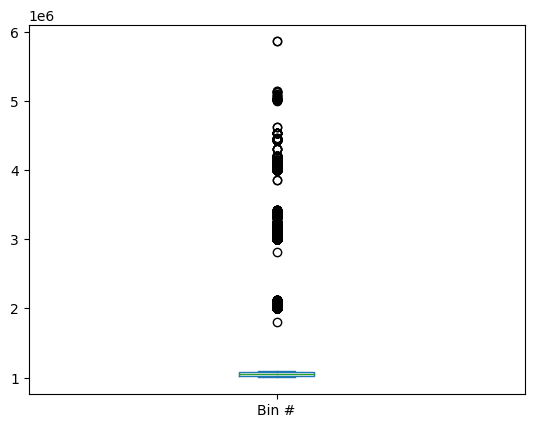

In [ ]:
data_raw['Bin #'].plot(kind='box')
pass

In [ ]:
data_raw['Bin #'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    1001446.00
0.010    1001989.00
0.050    1006903.60
0.100    1010192.00
0.500    1046924.00
0.900    3068544.60
0.950    3337537.10
0.990    4130227.96
0.995    4432172.80
Name: Bin #, dtype: float64

Удалим все строки таблицы, в которых `'Bin #'`выходят за пределы квантилей $0.005$, $0.995$.

In [20]:
rows_to_drop = data_raw[
    (data_raw['Bin #'] < data_raw['Bin #'].quantile(0.005)) | (data_raw['Bin #'] > data_raw['Bin #'].quantile(0.995))].index
data_raw.drop(rows_to_drop, inplace=True)
data_raw.shape

(19154, 18)

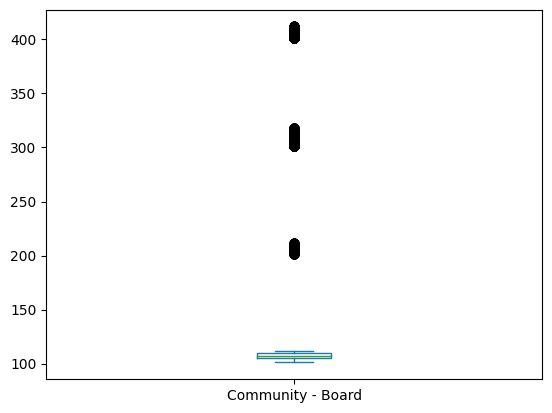

In [ ]:
data_raw['Community - Board'].plot(kind='box')
pass

In [ ]:
data_raw['Community - Board'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    101.0
0.010    101.0
0.050    102.0
0.100    102.0
0.500    107.0
0.900    306.0
0.950    313.0
0.990    405.0
0.995    407.0
Name: Community - Board, dtype: float64

Удалим все строки таблицы, в которых `'Community - Board'`выходят за пределы квантилей $0.005$, $0.995$.

In [21]:
rows_to_drop = data_raw[
    (data_raw['Community - Board'] < data_raw['Community - Board'].quantile(0.005)) | (data_raw['Community - Board'] > data_raw['Community - Board'].quantile(0.995))].index
data_raw.drop(rows_to_drop, inplace=True)
data_raw.shape

(19070, 18)

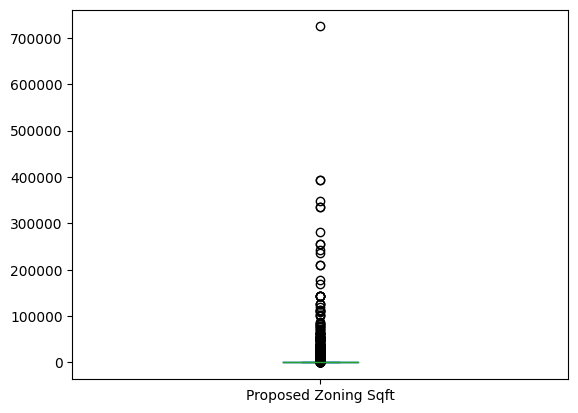

In [ ]:
data_raw['Proposed Zoning Sqft'].plot(kind='box')
pass

In [ ]:
data_raw['Proposed Zoning Sqft'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005        0.0
0.010        0.0
0.050        0.0
0.100        0.0
0.500        0.0
0.900        0.0
0.950        0.0
0.990     7875.0
0.995    32689.0
Name: Proposed Zoning Sqft, dtype: float64

Удалим все строки таблицы, в которых `'Proposed Zoning Sqft'`выходят за пределы квантилей $0.005$, $0.995$.

In [22]:
rows_to_drop = data_raw[
    (data_raw['Proposed Zoning Sqft'] < data_raw['Proposed Zoning Sqft'].quantile(0.005)) | (data_raw['Proposed Zoning Sqft'] > data_raw['Proposed Zoning Sqft'].quantile(0.995))].index
data_raw.drop(rows_to_drop, inplace=True)
data_raw.shape

(18975, 18)

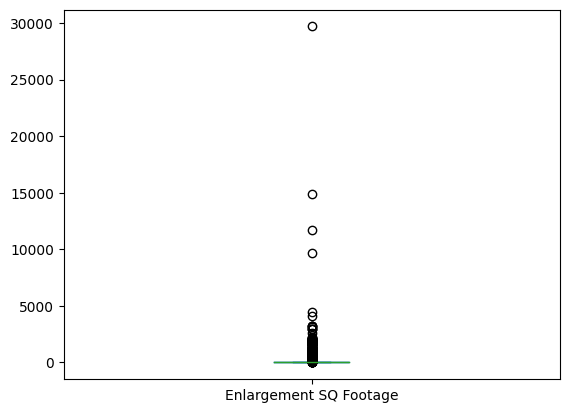

In [ ]:
data_raw['Enlargement SQ Footage'].plot(kind='box')
pass

In [ ]:
data_raw['Enlargement SQ Footage'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      0.00
0.010      0.00
0.050      0.00
0.100      0.00
0.500      0.00
0.900      0.00
0.950      0.00
0.990    396.30
0.995    924.68
Name: Enlargement SQ Footage, dtype: float64

Удалим все строки таблицы, в которых `'Enlargement SQ Footage'`выходят за пределы квантилей $0.005$, $0.995$.

In [23]:
rows_to_drop = data_raw[
    (data_raw['Enlargement SQ Footage'] < data_raw['Enlargement SQ Footage'].quantile(0.005)) | (data_raw['Enlargement SQ Footage'] > data_raw['Enlargement SQ Footage'].quantile(0.995))].index
data_raw.drop(rows_to_drop, inplace=True)
data_raw.shape

(18880, 18)

Можно вычислить матрицу корреляции для количественных признаков:

In [24]:
corr_mat = data_raw.corr()
corr_mat

<ipython-input-24-ee351f3bb90f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data_raw.corr()


,Block,Lot,Bin #,Community - Board,Proposed Zoning Sqft,Enlargement SQ Footage
Block,1.000000,-0.128734,0.436920,0.434629,0.073144,0.038665
Lot,-0.128734,1.000000,-0.146782,-0.157389,-0.033982,-0.018587
Bin #,0.436920,-0.146782,1.000000,0.997977,0.081365,0.056163
Community - Board,0.434629,-0.157389,0.997977,1.000000,0.083004,0.058039
Proposed Zoning Sqft,0.073144,-0.033982,0.081365,0.083004,1.000000,0.068594
Enlargement SQ Footage,0.038665,-0.018587,0.056163,0.058039,0.068594,1.000000


В цветном формате:

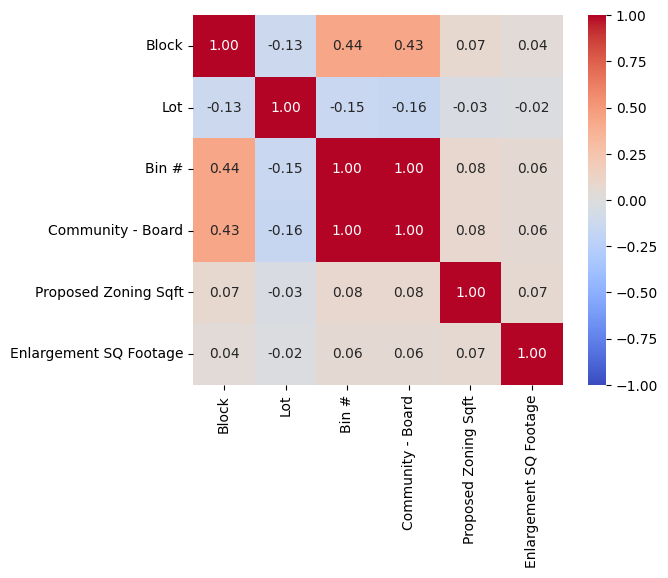

In [25]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Вывод: есть корреляция между `'Block'` и `'Bin #'`, `'Block'` и `'Commutity - Board'`, небольшая корреляция между `'Block'` и `'Lot'`, `'Lot'` и `'Bin #'`, `'Lot'` и `'Community - Board'`. Полная зависимость между `'Community - Board'` и `'Bin #'`.

Далее рассмотрим категориальные признаки.

Посмотрим, сколько раз некоторые номинальные переменные принимают то или иное значение.

In [26]:
data_raw['Borough'].value_counts()

MANHATTAN        15019
BROOKLYN          2747
BRONX              572
QUEENS             542
STATEN ISLAND        0
Name: Borough, dtype: int64

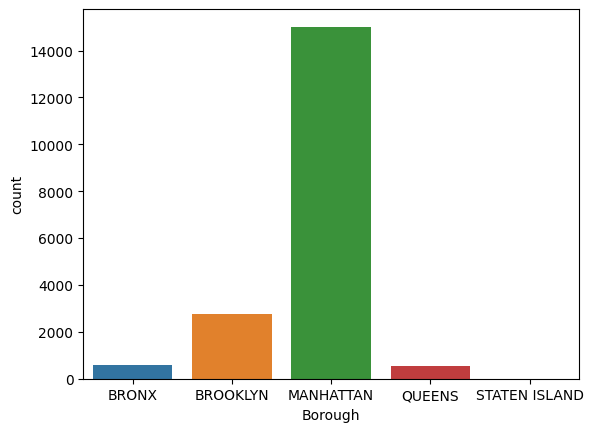

In [ ]:
sns.countplot(x='Borough', data=data_raw)
pass

Большая часть квартир - в Манхэттене.

In [ ]:
data_raw['Street Name'].value_counts()

PARK AVENUE               675
WEST END AVENUE           382
RIVERSIDE DRIVE           379
CENTRAL PARK WEST         372
BROADWAY                  268
                         ... 
GUY R BREWER BOULEVARD      0
SANFORD AVE                 0
HANOVER SQUARE              0
CONNECTICUT STREET          0
98 STREET                   0
Name: Street Name, Length: 2580, dtype: int64

Больше всех квартир - на Парк Авеню.

In [ ]:
data_raw['Job Type'].value_counts()

A2    17699
A1     1122
A3       59
Name: Job Type, dtype: int64

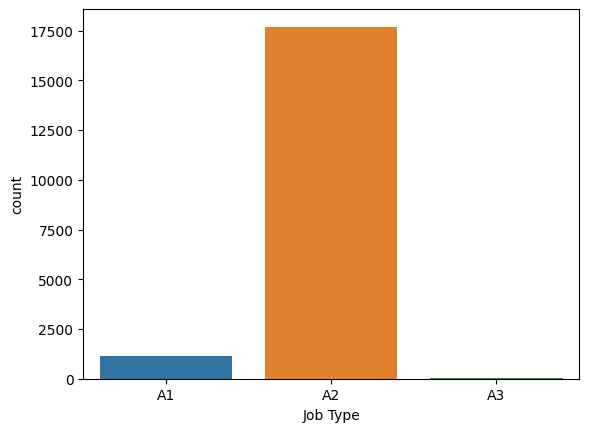

In [ ]:
sns.countplot(x='Job Type', data=data_raw)
pass

Чаще всего жилье имеет тип A2.

# 3. Обработать пропущенные значения

Пропущенные значения в таблице представлены значениями np.nan.

In [27]:
data_raw.isna().sum()

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  18874
Fully Permitted            3768
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        18786
Vertical Enlrgmt          18725
Enlargement SQ Footage        0
Zoning Dist1               2056
Job Description               0
dtype: int64

In [ ]:
data_raw["Curb Cut"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
19608    NaN
19609    NaN
19610    NaN
19611    NaN
19612    NaN
Name: Curb Cut, Length: 18880, dtype: category
Categories (1, object): ['X']

Признак `'Curb Cut'` имеет много пропущенных значений (6 заполненных vs 18874 пропущенных), при этом заполненные значения имеют только 1 тип `'X'`, поэтому целесообразно удалить этот признак из рассмотрения.

In [28]:
data_raw.drop('Curb Cut', axis=1, inplace=True)

Посчитаем, какое количество пропущенных значений в датасете:

In [29]:
sum_missing_cells = data_raw["Fully Permitted"].isna().sum() + data_raw["Horizontal Enlrgmt"].isna().sum() + data_raw["Vertical Enlrgmt"].isna().sum() + data_raw["Zoning Dist1"].isna().sum()
sum_missing_cells

43335

Количество пропущенных значений в %:

In [30]:
percent_missing_cells = (sum_missing_cells) / (data_raw.shape[0] * data_raw.shape[1]) * 100
percent_missing_cells

13.501682452642076

Заметим, что пропущенные значения присутствуют только в номинальных признаках.

Категориальные пропущенные значения заменим модой:

In [31]:
data_raw['Fully Permitted'].fillna(data_raw['Fully Permitted'].mode().iloc[0], inplace=True)
data_raw['Horizontal Enlrgmt'].fillna(data_raw['Horizontal Enlrgmt'].mode().iloc[0], inplace=True)
data_raw['Vertical Enlrgmt'].fillna(data_raw['Vertical Enlrgmt'].mode().iloc[0], inplace=True)
data_raw['Zoning Dist1'].fillna(data_raw['Zoning Dist1'].mode().iloc[0], inplace=True)

Посмотрим, чему равна мода соответствующего категориального признака:

In [32]:
data_raw['Fully Permitted'].mode()

0    01/29/2003
Name: Fully Permitted, dtype: category
Categories (4392, object): ['01/02/2003', '01/02/2008', '01/02/2009', '01/02/2013', ..., '12/31/2012',
                            '12/31/2014', '12/31/2015', '12/31/2018']

In [33]:
data_raw['Horizontal Enlrgmt'].mode()

0    Y
Name: Horizontal Enlrgmt, dtype: category
Categories (1, object): ['Y']

In [34]:
data_raw['Vertical Enlrgmt'].mode()

0    Y
Name: Vertical Enlrgmt, dtype: category
Categories (2, object): ['N', 'Y']

In [35]:
data_raw['Zoning Dist1'].mode()

0    R8B
Name: Zoning Dist1, dtype: category
Categories (145, object): ['BPC', 'C1-1', 'C1-2', 'C1-3', ..., 'R8X', 'R9', 'R9A', 'R9X']

Теперь проверим, что все пропущенные значения заполнены:

In [36]:
data_raw.isna().sum()

Job #                     0
Borough                   0
House #                   0
Street Name               0
Block                     0
Lot                       0
Bin #                     0
Job Type                  0
Community - Board         0
Fully Permitted           0
Initial Cost              0
Proposed Zoning Sqft      0
Horizontal Enlrgmt        0
Vertical Enlrgmt          0
Enlargement SQ Footage    0
Zoning Dist1              0
Job Description           0
dtype: int64

In [ ]:
data_raw.describe()

,Block,Lot,Bin #,Community - Board,Proposed Zoning Sqft,Enlargement SQ Footage
count,18880.000000,18880.000000,1.888000e+04,18880.000000,18880.000000,18880.000000
mean,1458.065307,1240.985487,1.458081e+06,146.811706,134.969015,4.823888
std,1187.520445,2745.478466,8.609661e+05,83.768234,1307.163863,49.529174
min,17.000000,1.000000,1.001446e+06,101.000000,0.000000,0.000000
25%,830.000000,17.000000,1.028714e+06,105.000000,0.000000,0.000000
50%,1244.000000,36.000000,1.046845e+06,107.000000,0.000000,0.000000
75%,1549.000000,65.000000,1.082691e+06,110.000000,0.000000,0.000000
max,8907.000000,7505.000000,4.432162e+06,407.000000,32689.000000,920.000000


In [ ]:
data_raw.describe(include=['category'])

,Job #,Borough,House #,Street Name,Job Type,Fully Permitted,Initial Cost,Horizontal Enlrgmt,Vertical Enlrgmt,Zoning Dist1
count,18880,18880,18880,18880,18880,18880,18880,18880,18880,18880
unique,12917,4,1794,2404,3,4332,46,1,1,141
top,103696608,MANHATTAN,200,PARK AVENUE,A2,01/29/2003,40000.00,Y,Y,R8B
freq,6,15019,226,675,17699,3790,2786,18880,18880,3976


# 4. Обработать категориальные признаки

Все категориальные признаки в данном датасете являются небинарными. К небинарным категориальным признакам применим метод бинаризации:

In [37]:
data_nonbinary = pd.get_dummies(data_raw[['Borough', 'House #','Street Name', 'Job Type', 'Fully Permitted', 'Horizontal Enlrgmt', 'Vertical Enlrgmt', 'Zoning Dist1']])
print(data_nonbinary.columns)

Index(['Borough_BRONX', 'Borough_BROOKLYN', 'Borough_MANHATTAN',
       'Borough_QUEENS', 'Borough_STATEN ISLAND', 'House #_1', 'House #_1-75',
       'House #_10', 'House #_10-15', 'House #_10-16',
       ...
       'Zoning Dist1_R7B', 'Zoning Dist1_R7D', 'Zoning Dist1_R7X',
       'Zoning Dist1_R8', 'Zoning Dist1_R8A', 'Zoning Dist1_R8B',
       'Zoning Dist1_R8X', 'Zoning Dist1_R9', 'Zoning Dist1_R9A',
       'Zoning Dist1_R9X'],
      dtype='object', length=9087)


In [38]:
data_raw = pd.concat((data_raw, data_nonbinary), axis=1).drop(['Borough', 'House #','Street Name', 'Job Type', 'Fully Permitted', 'Horizontal Enlrgmt', 'Vertical Enlrgmt', 'Zoning Dist1'], axis=1)

# 5. Провести нормализацию
Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из трех следующих способов:

приведение к отрезку [0,1] - это линейное преобразование, приводящее все значения к заданному отрезку; стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению; нормализация - приведение данных к единичной норме.

Выполним стандартизацию всех признаков:

In [39]:
data_numerical = data_raw[['Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Block', 'Lot', 'Bin #', 'Community - Board']]
data_numerical.describe()

,Proposed Zoning Sqft,Enlargement SQ Footage,Block,Lot,Bin #,Community - Board
count,18880.000000,18880.000000,18880.000000,18880.000000,1.888000e+04,18880.000000
mean,134.969015,4.823888,1458.065307,1240.985487,1.458081e+06,146.811706
std,1307.163863,49.529174,1187.520445,2745.478466,8.609661e+05,83.768234
min,0.000000,0.000000,17.000000,1.000000,1.001446e+06,101.000000
25%,0.000000,0.000000,830.000000,17.000000,1.028714e+06,105.000000
50%,0.000000,0.000000,1244.000000,36.000000,1.046845e+06,107.000000
75%,0.000000,0.000000,1549.000000,65.000000,1.082691e+06,110.000000
max,32689.000000,920.000000,8907.000000,7505.000000,4.432162e+06,407.000000


In [40]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [41]:
data_numerical.describe()

,Proposed Zoning Sqft,Enlargement SQ Footage,Block,Lot,Bin #,Community - Board
count,18880.000000,1.888000e+04,1.888000e+04,1.888000e+04,1.888000e+04,18880.000000
mean,0.000000,-9.032323e-18,-7.828013e-17,1.806465e-17,1.204310e-16,0.000000
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-0.103253,-9.739487e-02,-1.213508e+00,-4.516464e-01,-5.303751e-01,-0.546886
25%,-0.103253,-9.739487e-02,-5.288880e-01,-4.458186e-01,-4.987038e-01,-0.499136
50%,-0.103253,-9.739487e-02,-1.802624e-01,-4.388982e-01,-4.776449e-01,-0.475260
75%,-0.103253,-9.739487e-02,7.657526e-02,-4.283354e-01,-4.360102e-01,-0.439447
max,24.904323,1.847752e+01,6.272679e+00,2.281575e+00,3.454353e+00,3.106050


In [42]:
data_raw.drop(['Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Block', 'Lot', 'Bin #', 'Community - Board'], axis=1)
data_raw = pd.concat((data_raw, data_numerical), axis=1)

# 6. Обработка текстовых признаков

In [43]:
data_raw['Job Description'].dtype

dtype('O')

Приводим текст к нижнему регистру:

In [44]:
def lower(text):
    return text.lower()

data_raw['Text'] = data_raw['Job Description'].apply(lambda x:lower(x))

Убираем url и html ссылки:

In [45]:
def remove_urls(text):
  return re.sub(r'https?://\S+|www\.\S+', '', text)

data_raw['Text'] = data_raw['Text'].apply(lambda x:remove_urls(x))

def remove_html(text):
  return re.sub(r'<.*?>', '', text)

data_raw['Text'] = data_raw['Text'].apply(lambda x:remove_html(x))

#Remove mentions, hashtags and &
def remove_mention(x):
    return re.sub(r'@\w+','',x)

data_raw['Text'] = data_raw['Text'].apply(lambda x:remove_mention(x))

def remove_hash(x):
    return re.sub(r'#\w+','',x)

data_raw['Text'] = data_raw['Text'].apply(lambda x:remove_hash(x))

def remove_amp(x):
    return re.sub(r'\&amp','',x)

data_raw['Text'] = data_raw['Text'].apply(lambda x:remove_amp(x))

Убираем stopwords и пунктуацию:

In [46]:
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def punct_remove(text):
    return re.sub(r'[^\w\s]', '', text)

data_raw['Text'] = data_raw['Text'].apply(lambda x:punct_remove(x))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

data_raw['Text'] = data_raw['Text'].apply(lambda x:remove_stopwords(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Убираем лишние пробелы:

In [47]:
def remove_space(text):
    return re.sub(r"\s+"," ",text).strip()

data_raw['Text'] = data_raw['Text'].apply(lambda x:remove_space(x))

Выполняем стемминг - находим основы слова для заданного исходного слова:

In [48]:
from nltk.stem import PorterStemmer

def stemming(text):
    return ' '.join([PorterStemmer().stem(w) for w in text.split()])

data_raw['Text'] = data_raw['Text'].apply(lambda x:stemming(x))

## Word cloud

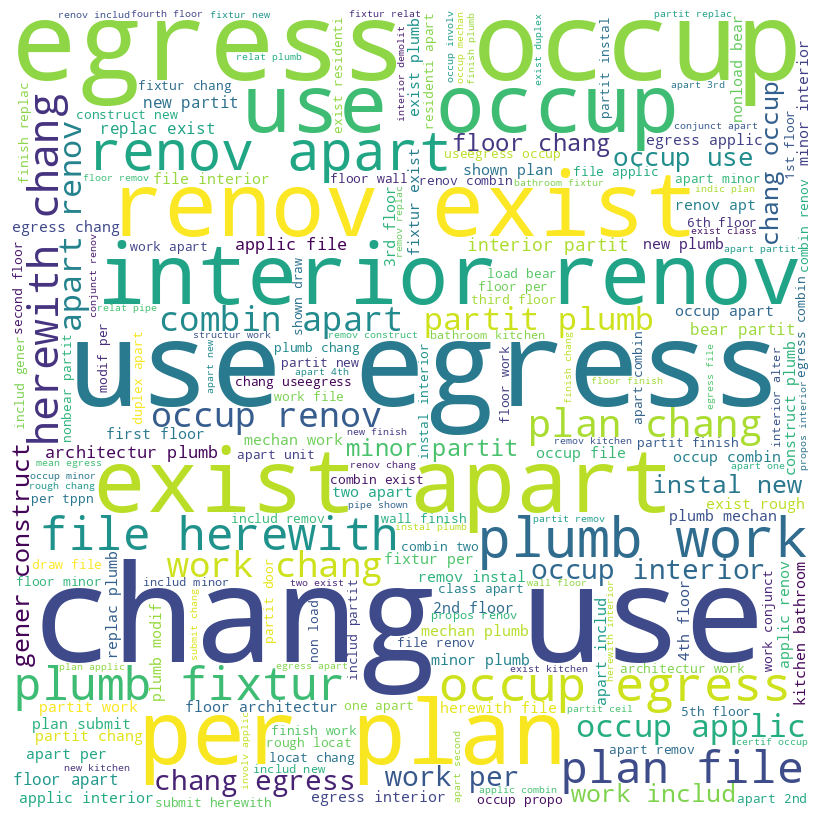

In [49]:
from wordcloud import WordCloud

text = " ".join(x for x in data_raw['Text'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = "white")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5)

X_text = vectorizer.fit_transform(data_raw['Text'])

# 6. Разбить данные на обучающую и тестовую выборки

In [53]:
X = data_raw.drop(['Job #','Job Description', 'Text', 'Initial Cost'], axis=1)
X.reset_index(drop=True, inplace=True)
X_text = X_text.toarray()
df = pd.DataFrame(X_text)
X = pd.concat([X, df], axis=1, join="inner")
X.columns = X.columns.astype(str)
y = data_raw['Initial Cost']

Разобьем данные на обучающую и тестовую выборки следующим образом: 75% - обучающая выборка, 25% - тестовая.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(14160, 4720)

# 7. Запустить классификатор ближайших соседей. Вычислить ошибки на тестовой и обучающей выборках

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': k_arr}, cv=4)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

Оптимальное число соседей и ошибка на обучающей выборке:



In [57]:
print(best_cv_err, best_n_neighbors)

0.5416666666666667 1


Ошибка на обучающей и тестовой выборках:

In [58]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0015536723163841809 0.4447033898305085


Построим матрицу рассогласования:

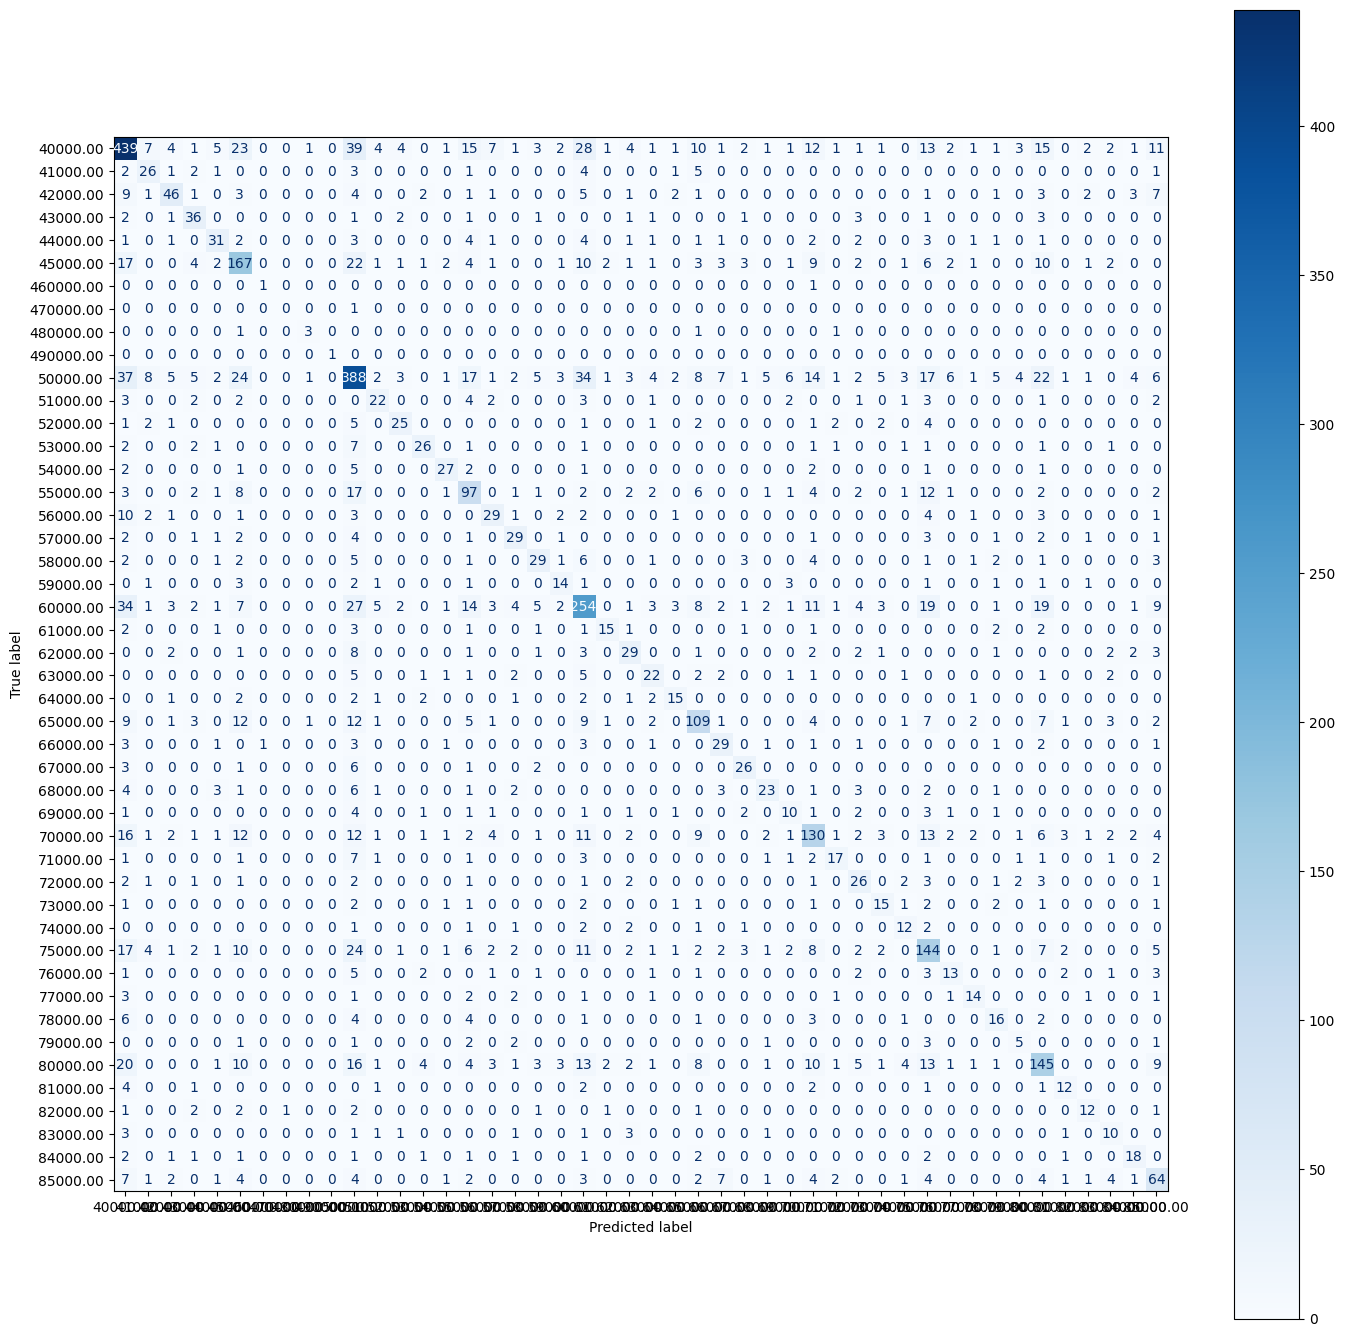

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
fig = plt.figure(figsize=(17, 17))
ax = fig.add_subplot(1,1,1)
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
pass

# 8. Общие выводы

Для выполнении задания был использован датасет Housing Cost in New York. Была задача определить цену жилья в Нью-Йорке по различным признакам.

В ходе работы были выполнены следующие задачи:

*  Описана задача
*Прочитаны данные
*Визуализированы данные и вычислены основные характеристики
*Обработаны пропущенные значения
*Обработаны категориальные признаки
*Проведена нормализация
*Данные разбиты на обучающую и тестовую выборки
*Запущен классификатор ближайших соседей для разных количеств
*Вычислена ошибка на обучающей и тестовой выборках - сделаны выводы


Классификатор ближайших соседей был запущен при разных значениях параметра k - числа соседей с целью определить оптимальный.Оптимальное число соседей: 1. Ошибка на тестовой выборке при этом параметре - 0.4447033898305085, на обучающей - 0.0015536723163841809. Это говорит о недообучении.

# **ДЗ к 28.12.2023**

# Обучить логистическую регрессию, RandomForest, полносвязную (неглубокую - 1-2 скрытых слоя) нейронную сеть.

1.1. Логистическая регрессия

Ошибка на обучающей и тестовой выборке:

In [78]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
Y_train_predict = lg.predict(X_train)
Y_test_predict = lg.predict(X_test)

err_train = np.mean(y_train != Y_train_predict)
err_test  = np.mean(y_test  != Y_test_predict)

print(err_train, err_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8463276836158192 0.849364406779661


Матрица рассогласования:

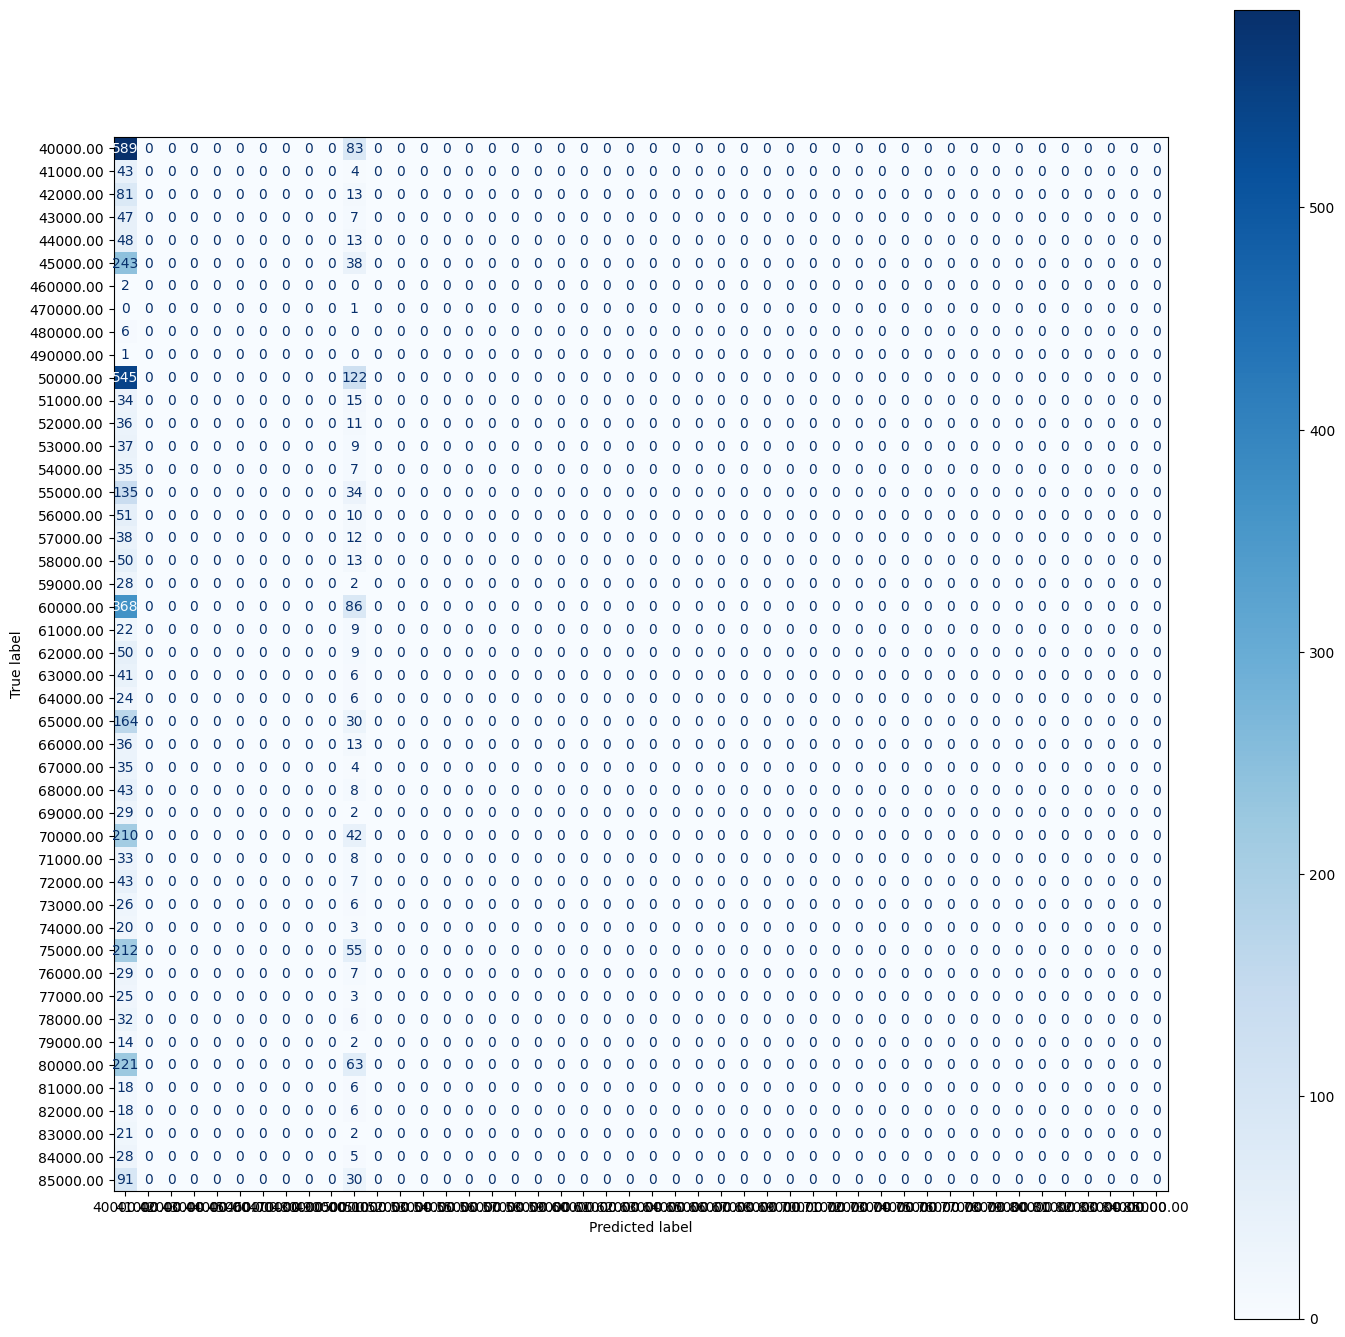

In [79]:
fig_lg = plt.figure(figsize=(17, 17))
ax_lg = fig_lg.add_subplot(1,1,1)
ConfusionMatrixDisplay.from_estimator(lg, X_test, y_test, cmap=plt.cm.Blues, ax=ax_lg)

Логистическая регрессия в данной задаче предсказывает только 2 класса из 18, и ошибка на тестовой выборке очень большая.

1.2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

depth = np.arange(1, 150, 15)
test_err = []
train_err = []
for d in depth:
    rd_forest_model = RandomForestClassifier(max_depth = d)
    rd_forest_model.fit(X_train, y_train)

    Y_train_pred = rd_forest_model.predict(X_train)
    Y_test_pred = rd_forest_model.predict(X_test)
    train_err.append(np.mean(y_train != Y_train_pred))
    test_err.append(np.mean(y_test != Y_test_pred))

График зависимости ошибки от глубины дерева:

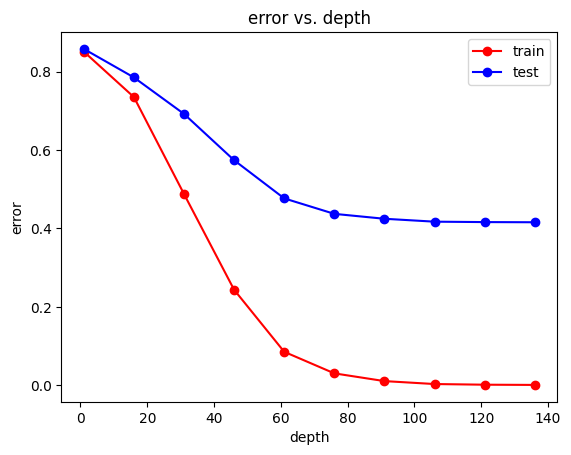

In [ ]:
plt.plot(depth, train_err, 'r-o', label = 'train')
plt.plot(depth, test_err, 'b-o', label = 'test')
plt.title('error vs. depth')
plt.xlabel('depth')
plt.ylabel('error')
plt.legend()

Минимальная ошибка на обучающей и тестовой выборках:

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0013418079096045197 0.41588983050847456


Максимальная глубина дерева, когда достигается наименьшая ошибка:

In [ ]:
opt_dep = depth[test_err == min_test_err]
print(opt_dep)

[136]


Для лучшего значения ошибки на тестовой выборке построим матрицу рассогласования.

In [62]:
from sklearn.ensemble import RandomForestClassifier
rd_forest_model = RandomForestClassifier(max_depth = 136)
rd_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=136)

Матрица рассогласования:

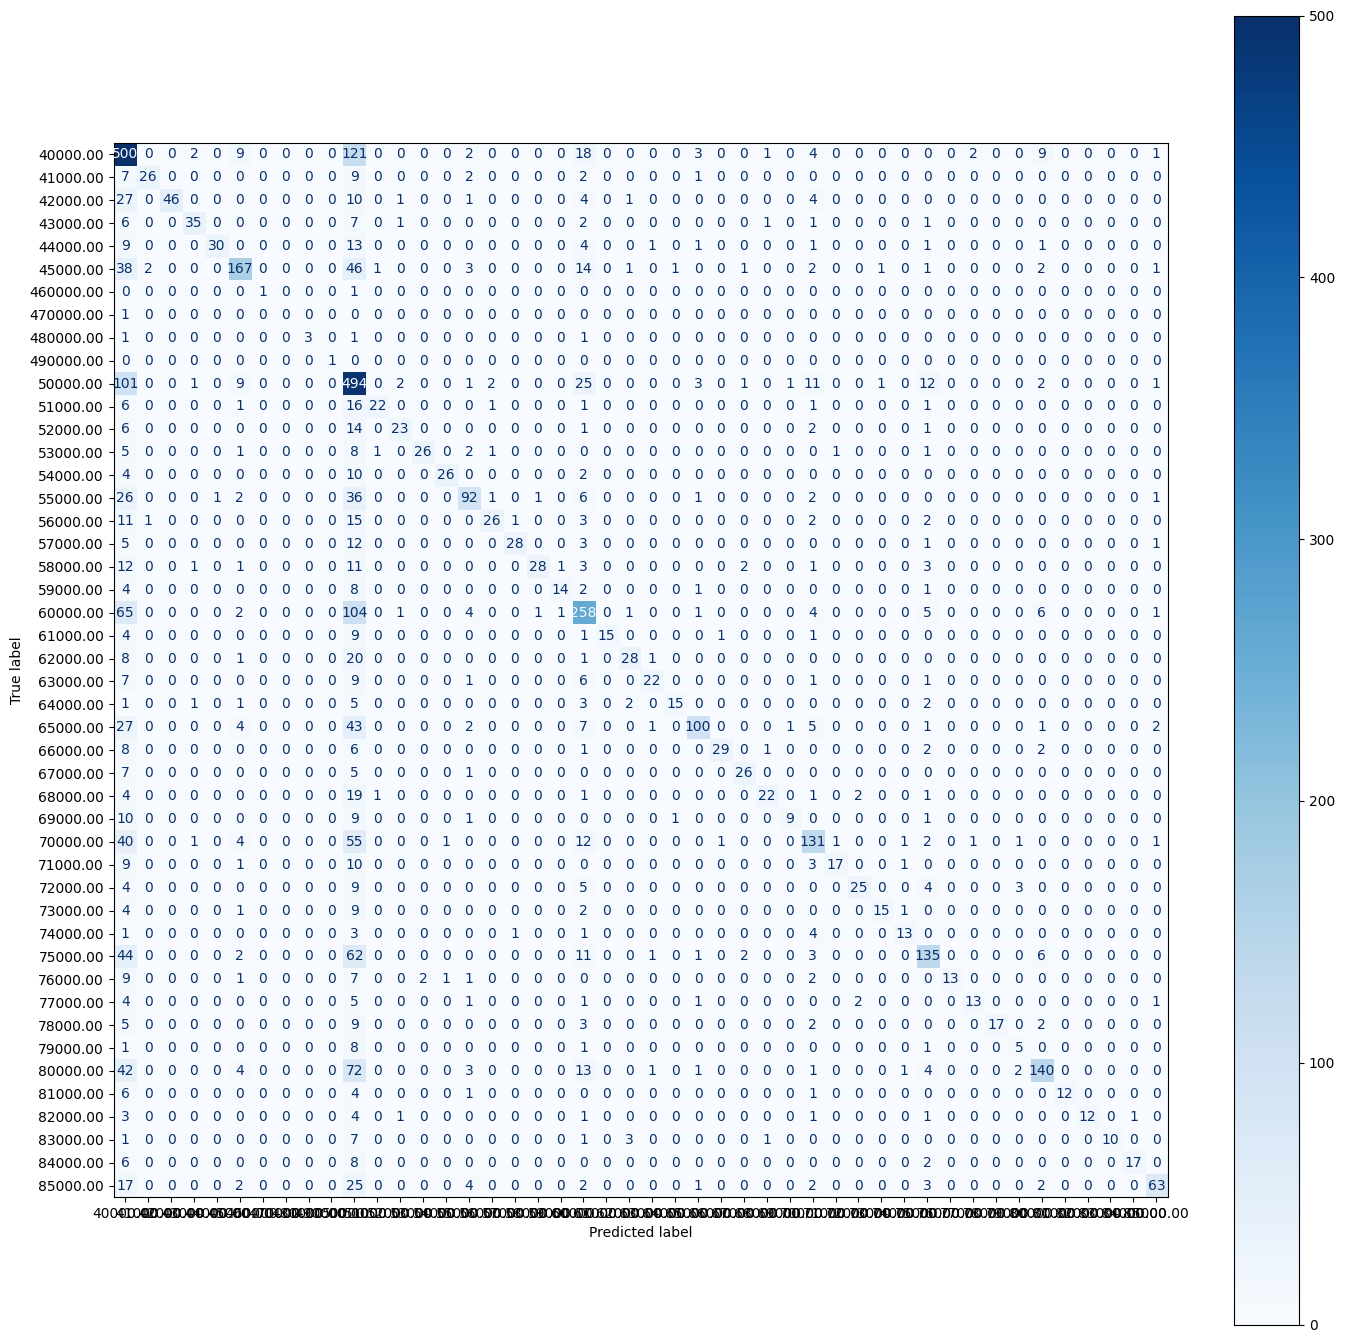

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
fig_rf = plt.figure(figsize=(17, 17))
ax_rf = fig_rf.add_subplot(1,1,1)
ConfusionMatrixDisplay.from_estimator(rd_forest_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax_rf)

По сравнению с логистической регрессией количество правильно предсказанных случаев возросло, однако всё равно random forest чаще предсказывает 2-3 класса из 18, как и логистическая регрессия.

1.3. Полносвязная нейронная сеть

Будем использовать 1 скрытый слой. Найдем оптимальное количество нейронов в слое.

In [70]:
from sklearn.neural_network import MLPClassifier

hidden_layer = np.arange(1, 30, 5)
test_err = []
train_err = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ), random_state = 42, max_iter = 100000)
    mlp_model.fit(X_train, y_train)

    Y_train_pred = mlp_model.predict(X_train)
    Y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != Y_train_pred))
    test_err.append(np.mean(y_test != Y_test_pred))

График зависимости ошибки от количества нейронов:

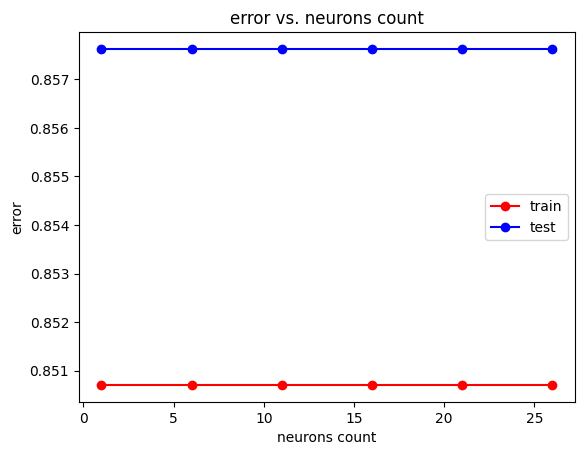

In [71]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()

Найдем минимальную ошибку на тестовой выборке:

In [72]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.8507062146892655 0.8576271186440678


Найдем количество нейронов, при котором достигается наименьшая ошибка:

In [73]:
opt_neuron = hidden_layer[test_err == min_test_err]
print(opt_neuron)

[ 1  6 11 16 21 26]


Построим матрицу рассогласования для данного случая.

In [76]:
mlp_model = MLPClassifier(hidden_layer_sizes = (26, ), random_state = 42, max_iter = 10000)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(26,), max_iter=10000, random_state=42)

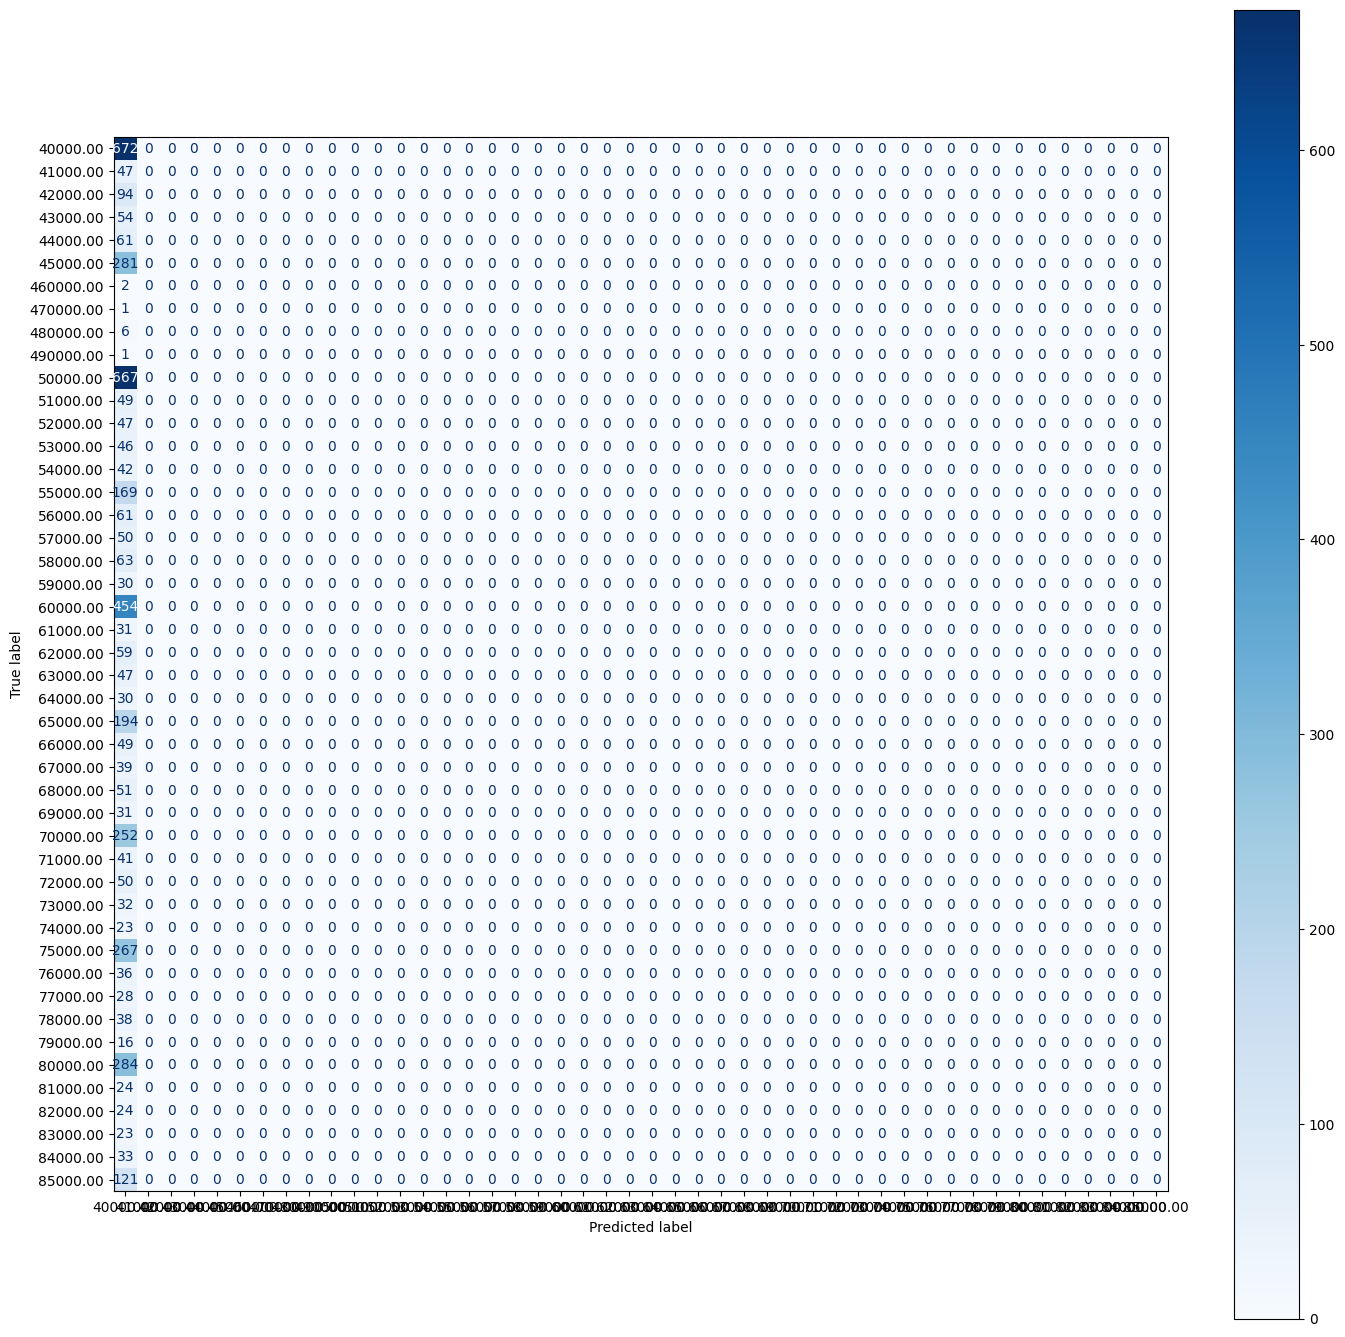

In [77]:
fig_mlp = plt.figure(figsize=(17, 17))
ax_mlp = fig_mlp.add_subplot(1,1,1)
ConfusionMatrixDisplay.from_estimator(mlp_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax_mlp)

Этот классификатор предсказывает только одно значение, что говорит о том, что он не подходит для данного случая.

# Выводы

Сравним ошибки на тестовых выборках у рассмотренных классификаторов:

knn: 0.4447033898305085

лог. регрессия: 0.849364406779661

random forest: 0.41588983050847456

нейронная сеть: 0.8576271186440678

Наименьшая ошибка на тестовой выборке наблюдается у random forest.